Object:- Implementation of BPNN using TensorFlow Library

Method 1

In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Define XOR problem data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input data
y = np.array([[0], [1], [1], [0]])  # Target labels

In [15]:
# Define the model using TensorFlow Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, input_dim=2, activation='sigmoid'),  # Hidden layer with 4 neurons and sigmoid activation
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with 1 neuron and sigmoid activation
])

# Compile the model with a loss function, optimizer, and evaluation metric
model.compile(loss='binary_crossentropy',  # Binary Crossentropy for binary classification
              optimizer='adam',  # Adam optimizer
              metrics=['accuracy'])  # Track accuracy during training

In [17]:
# Train the model
history = model.fit(X, y, epochs=1000, verbose=0)

In [19]:
# Evaluate the model's performance
loss, accuracy = model.evaluate(X, y)
print(f'Final Model Accuracy: {accuracy * 100:.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - accuracy: 1.0000 - loss: 0.5905
Final Model Accuracy: 100.00%


In [21]:
# Predictions
predictions = model.predict(X)
print("\nPredictions:")
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step

Predictions:
[[0.43455327]
 [0.5078874 ]
 [0.6025542 ]
 [0.45540547]]


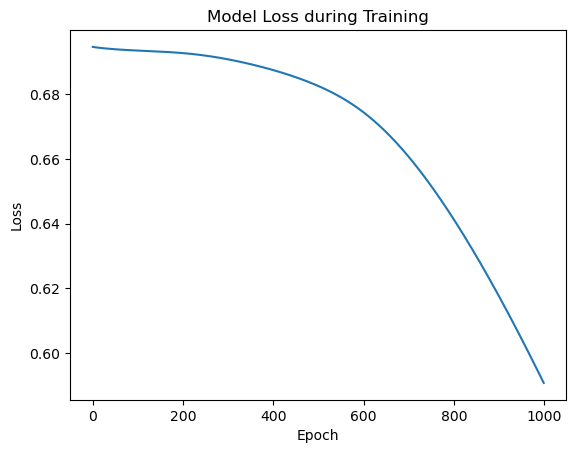

In [23]:
# Plot the loss during training (for monitoring convergence)
plt.plot(history.history['loss'])
plt.title('Model Loss during Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Method 2nd

In [29]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification # Example dataset

In [31]:
def create_bpnn(input_dim, hidden_dim, output_dim, learning_rate=0.01):
    """
    Creates a simple Backpropagation Neural Network (BPNN) using TensorFlow.

    Args:
        input_dim: Number of input features.
        hidden_dim: Number of neurons in the hidden layer.
        output_dim: Number of output neurons.
        learning_rate: Learning rate for the optimizer.

    Returns:
        A TensorFlow Keras model.
    """

    model = tf.keras.Sequential([
        tf.keras.layers.Dense(hidden_dim, activation='relu', input_shape=(input_dim,)),
        tf.keras.layers.Dense(output_dim, activation='sigmoid') # For binary classification
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',  # Use 'categorical_crossentropy' for multi-class
                  metrics=['accuracy'])

    return model

In [33]:
def train_bpnn(model, X_train, y_train, X_val, y_val, epochs=100, batch_size=32):
    """
    Trains the BPNN model.

    Args:
        model: The TensorFlow Keras model.
        X_train: Training data features.
        y_train: Training data labels.
        X_val: Validation data features.
        y_val: Validation data labels.
        epochs: Number of training epochs.
        batch_size: Batch size for training.
    """

    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(X_val, y_val), verbose=1)
    return history

def evaluate_bpnn(model, X_test, y_test):
    """
    Evaluates the BPNN model.

    Args:
        model: The TensorFlow Keras model.
        X_test: Test data features.
        y_test: Test data labels.
    """

    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

In [35]:
# Example usage:
if __name__ == "__main__":
    # Generate a sample dataset
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

    # Split the dataset into training, validation, and test sets
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Scale the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)

    # Define the model parameters
    input_dim = X_train.shape[1]
    hidden_dim = 10
    output_dim = 1  # Binary classification

    # Create and train the BPNN model
    model = create_bpnn(input_dim, hidden_dim, output_dim)
    train_bpnn(model, X_train, y_train, X_val, y_val, epochs=100)

    # Evaluate the model
    evaluate_bpnn(model, X_test, y_test)

Epoch 1/100


C:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.6382 - loss: 0.6731 - val_accuracy: 0.8733 - val_loss: 0.4237
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8213 - loss: 0.4331 - val_accuracy: 0.9200 - val_loss: 0.3146
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8972 - loss: 0.3197 - val_accuracy: 0.9200 - val_loss: 0.2448
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9134 - loss: 0.2875 - val_accuracy: 0.9267 - val_loss: 0.2140
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9342 - loss: 0.2272 - val_accuracy: 0.9267 - val_loss: 0.1925
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9511 - loss: 0.1951 - val_accuracy: 0.9333 - val_loss: 0.1779
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9378 - loss: 0.1901 - val_accuracy: 0.9400 - val_loss: 0.1656
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9522 - loss: 0.1550 - val_accuracy: 0.9333 - val_l